In [1]:
import os
import pandas as pd
from generate_conserved_numbering import *
from conservation_variabiliy_profiles import *


%load_ext autoreload
%autoreload 2

## 1. Prepare the alignment file:
* The alignment file has to be saved as a csv file in which the rows are the aligned protein sequences. With '-' indicating the gab character.
* The first row contains the structural information. The TM regions marked with 'H' and the rest as '-' (hyphen)” for the entire length of the alignment, including the gaps.
* The first column contains the protein name. It can be any name or the PDB ID of a corresponding protein structure, this column will be later used to map the aligned sequences to renumber the PDB structures.

In [2]:
ALIGNEMENT_FILE = './example_files/example_alignement.csv'
alignment_df = pd.read_csv(ALIGNEMENT_FILE, sep=';')   

In [3]:
alignment_df[0:3]

,TM_helix,-,-.1,-.2,-.3,-.4,-.5,-.6,-.7,-.8,...,-.230,-.231,-.232,-.233,-.234,-.235,-.236,-.237,-.238,-.239
0,"Bacteriorhodopsin, BR (7Z09)",-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,"M repens rhodopsin, MastR (6XL3)",-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,KR2 (6TK6),-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


## 2.Assigne conserved numbers:
* Call the *assign_conserved_numbers* function from the *generate_conserved_numbering.py* script with the loaded alignment csv as a Pandas DataFrame.
* The function returns a DataFrame with the assigned *Numbering Scheme* (*NS*)-numbers. This DataFrame can be saved for furher analysis. 

In [4]:
sequence_conservation = assign_conserved_numbers(alignment_df)

In [5]:
sequence_conservation[100:110]

,"Bacteriorhodopsin, BR (7Z09)","M repens rhodopsin, MastR (6XL3)",KR2 (6TK6),"Gloeobacter rhodopsin, GR (6NWD)",helix_number,amino_acid_variability,most_frequent_amino_acid,occurrence,conservation,location_id,NS_number
100,D,R,K,R,2,3,R,2,0.5,35.0,2.35
101,A,W,F,Y,2,4,A,1,0.25,36.0,2.36
102,K,Q,Q,R,2,3,Q,2,0.5,37.0,2.37
103,K,I,M,L,2,4,I,1,0.25,38.0,2.38
104,F,L,S,A,2,4,A,1,0.25,39.0,2.39
105,Y,Y,N,L,2,3,Y,2,0.5,40.0,2.40
106,A,T,I,L,2,4,A,1,0.25,41.0,2.41
107,I,L,L,V,2,3,L,2,0.5,42.0,2.42
108,T,N,S,S,2,3,S,2,0.5,43.0,2.43
109,T,F,A,A,2,3,A,2,0.5,44.0,2.44


## 3. Renumber PDB structures with conserved numbering:
* In this step the NS-numbers can be assigned to PDB structures whose sequences are in the alignment. 
* The PDB file has to be mapped to the protein name in the alignment file. Below an example is shown, but the mapping can be created in any other way.
* The same alignment can be assigned to multiple PDB structures, e.g: when there are multiple crystal structures of the same proteins or for structures with point mutations.

In [6]:
pdb_alignement_map = {
    '7z09' : 'Bacteriorhodopsin, BR (7Z09)',
    '6xl3' : 'M repens rhodopsin, MastR (6XL3)',
    '6wp8' : 'M repens rhodopsin, MastR (6XL3)', # Same sequence, but different structre with a point mutation
    '6tk6' : 'KR2 (6TK6)',
    '6nwd' : 'Gloeobacter rhodopsin, GR (6NWD)',
}

In [7]:
pdb_source_folder =  './example_files/PDBs/'
pdb_ids = [file.split('.pdb')[0] for file in os.listdir(pdb_source_folder) if file.endswith('.pdb')]
FOLDER_TO_SAVE_RESULTS =  './example_files/PDBs/renumbered'

In [8]:
for pdb_id in pdb_ids:
    path_to_source_pdb = os.path.join(pdb_source_folder, f'{pdb_id}.pdb')
    protein_name_in_alignment = pdb_alignement_map[pdb_id]
    renumber_pdb(sequence_conservation, path_to_source_pdb, pdb_id, protein_name_in_alignment, FOLDER_TO_SAVE_RESULTS)

## Additional options:
* add NS-prot numbers to the original PBD file as the last column
* create conservation and variablity profiles


In [9]:
for pdb_id in pdb_ids:
    path_to_source_pdb = os.path.join(pdb_source_folder, f'{pdb_id}.pdb')
    protein_name_in_alignment = pdb_alignement_map[pdb_id]
    add_NS_numbers_to_pdb(sequence_conservation, path_to_source_pdb, pdb_id, protein_name_in_alignment, FOLDER_TO_SAVE_RESULTS)


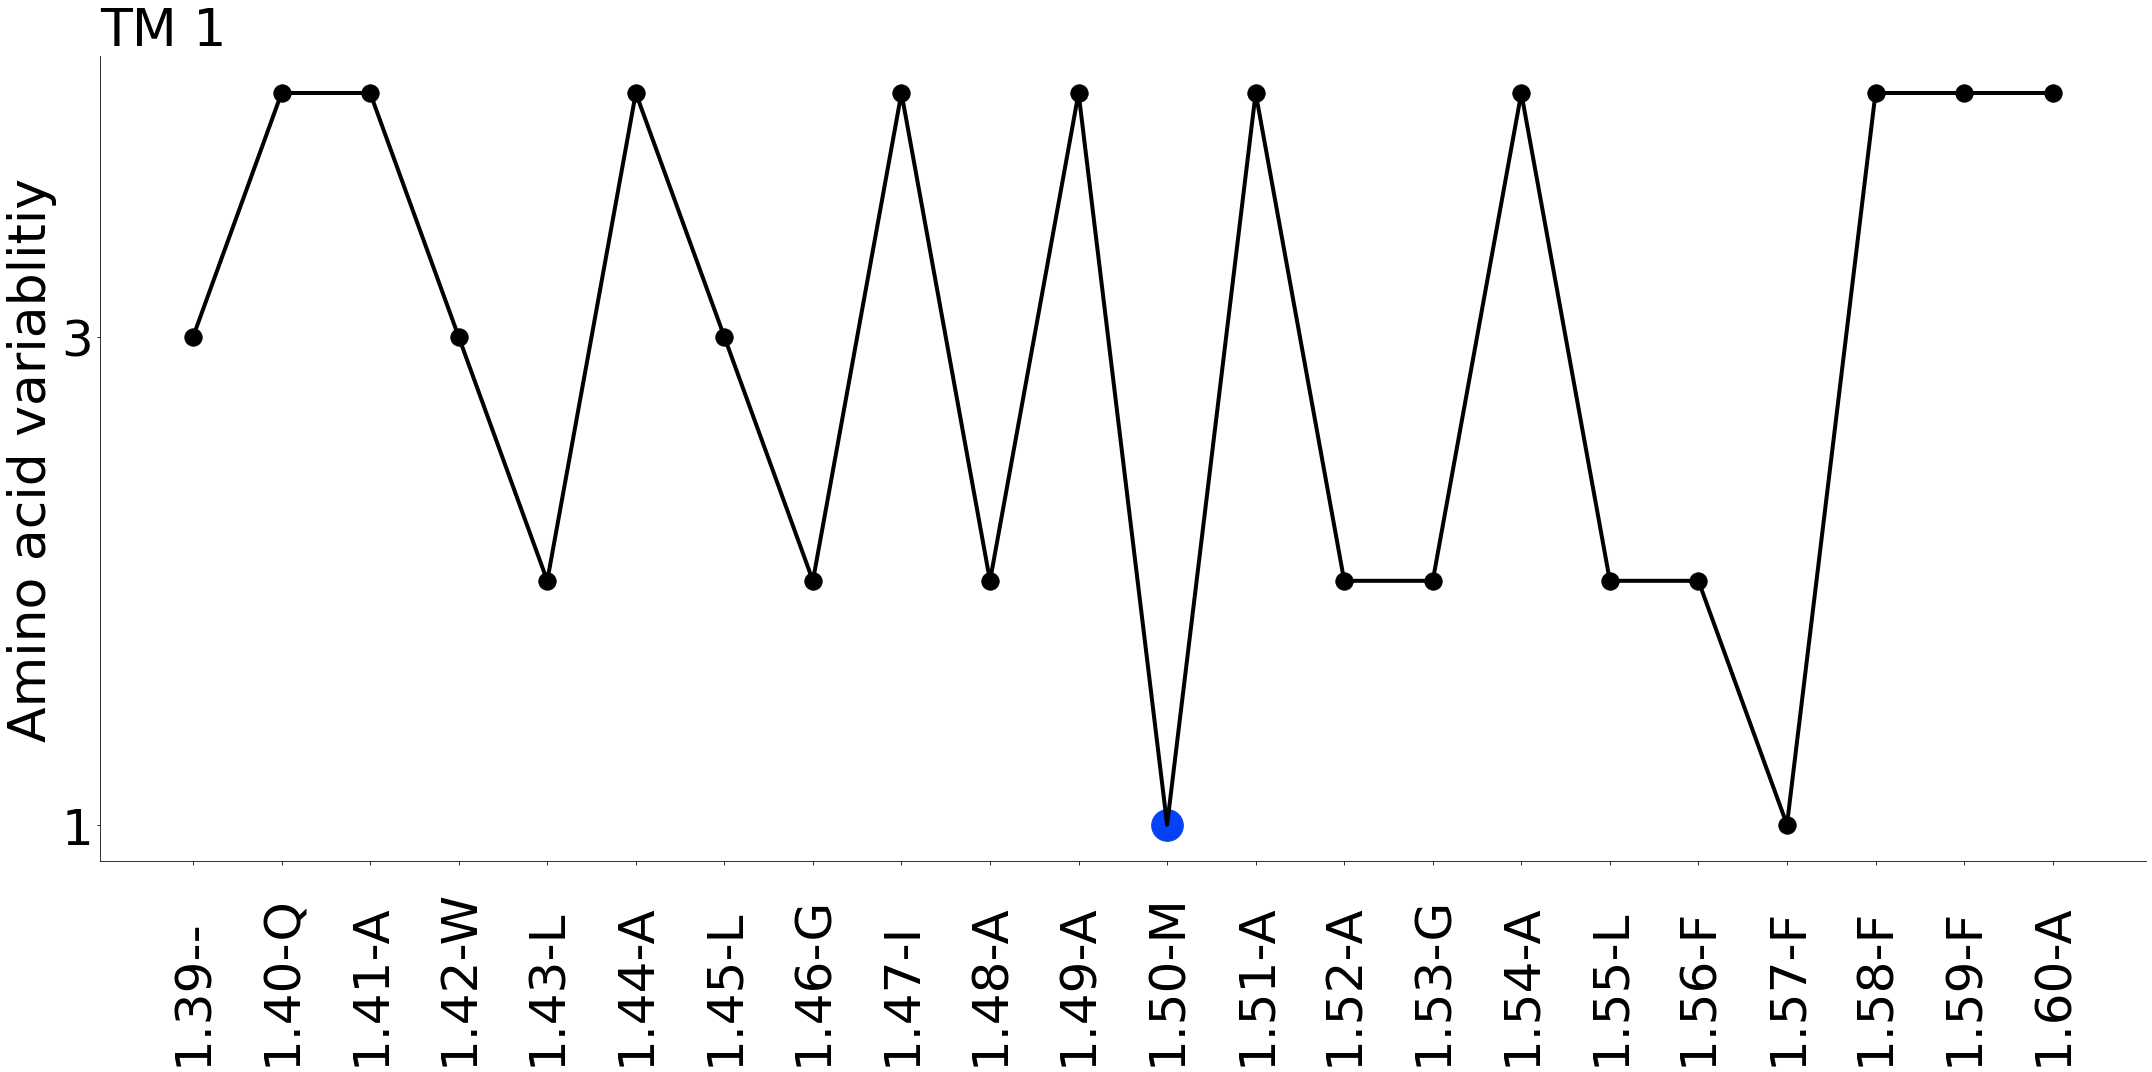

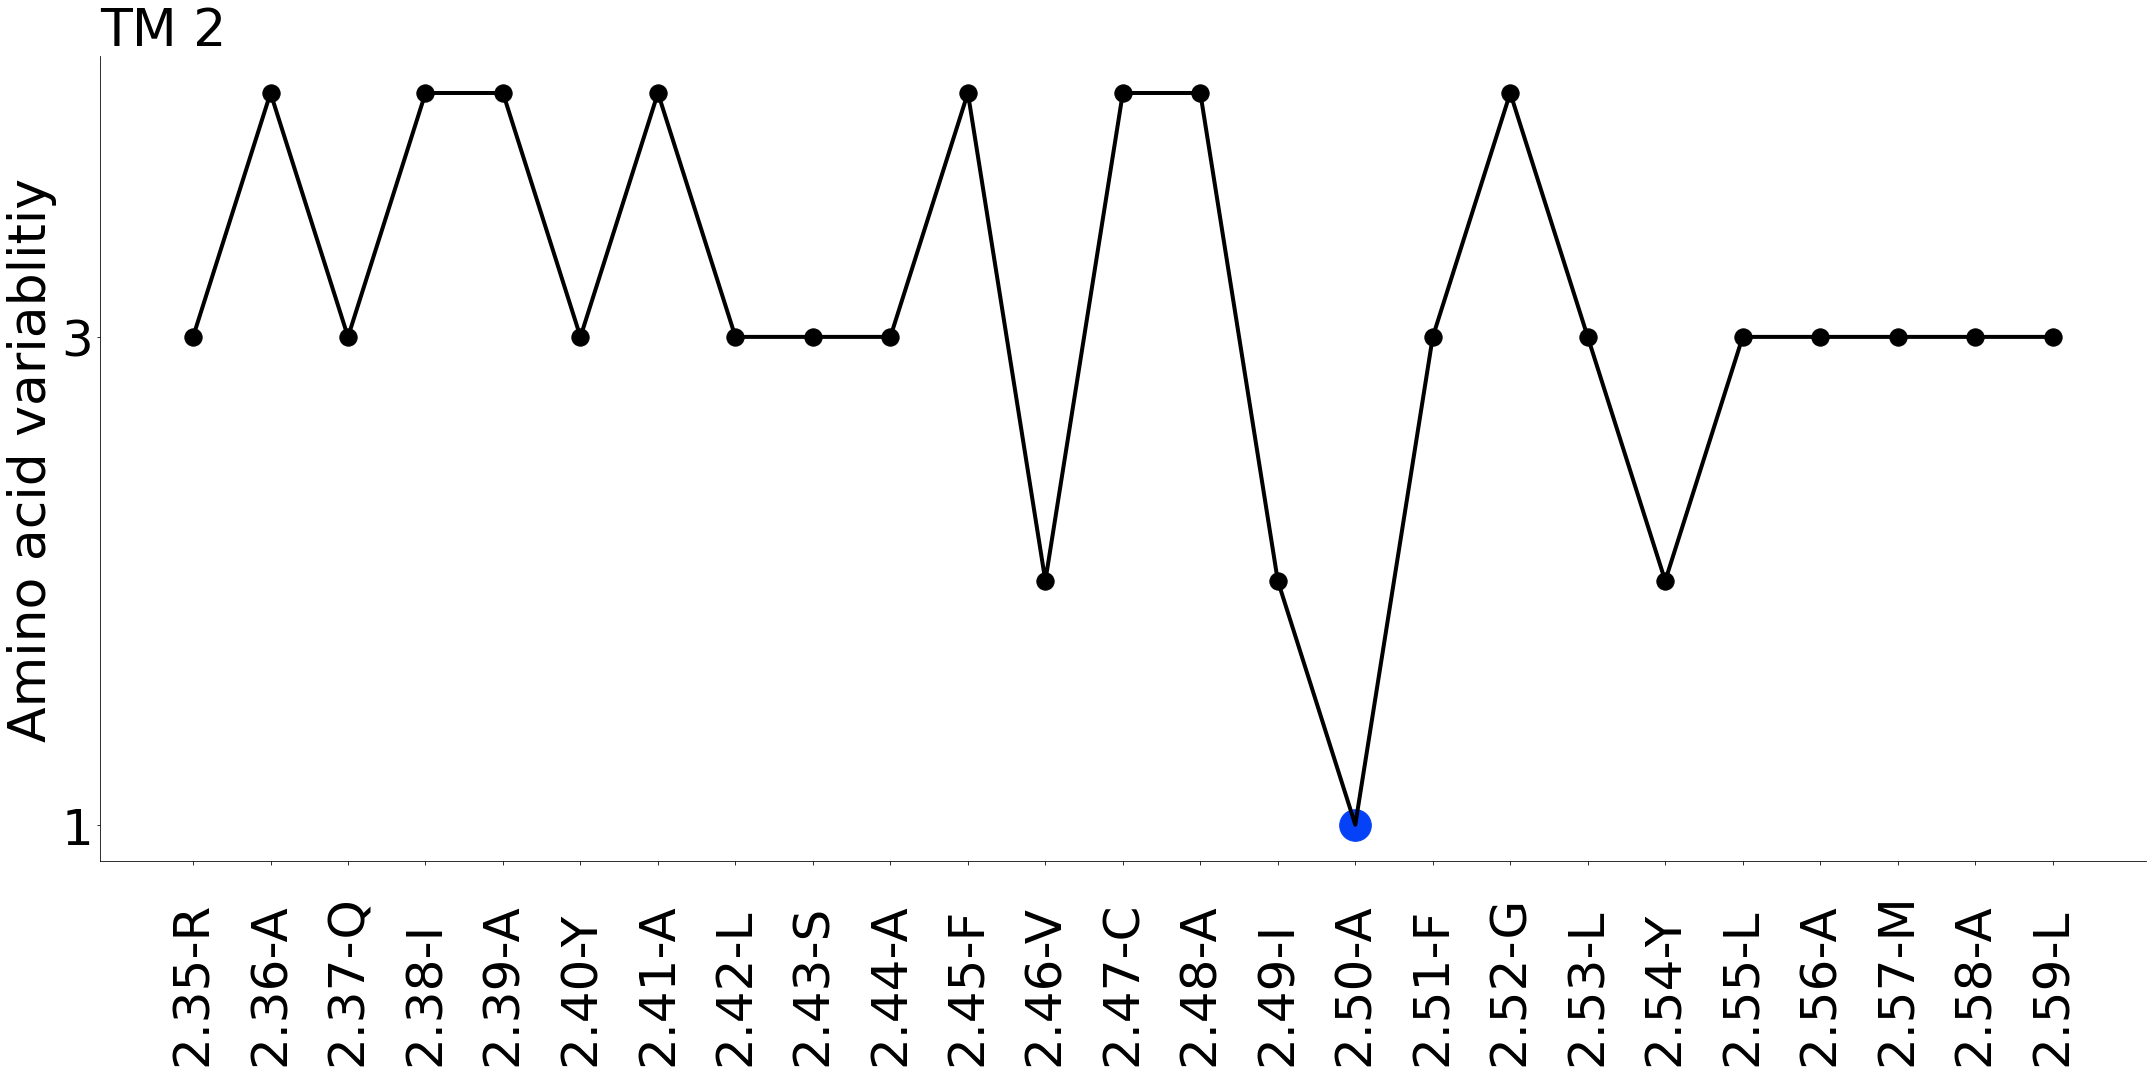

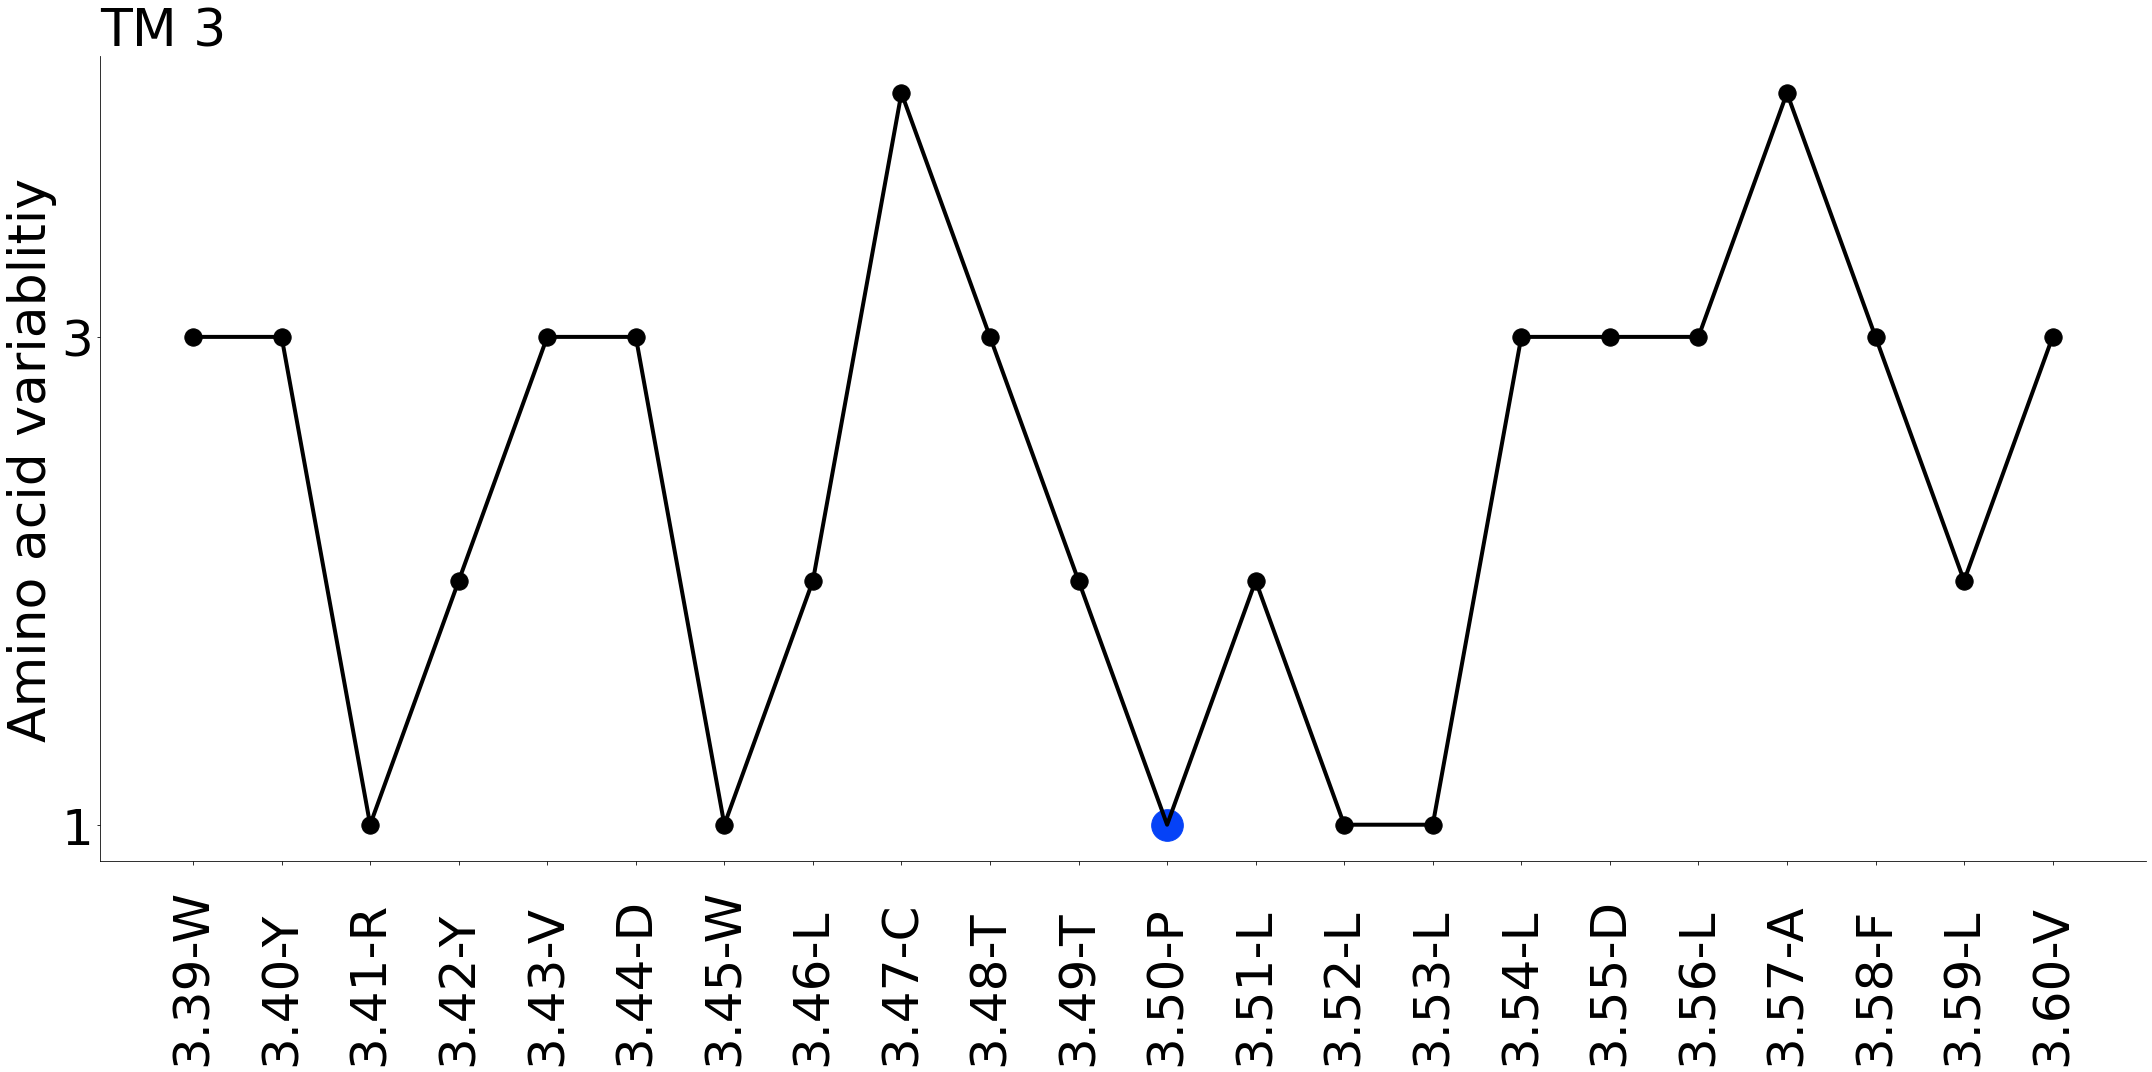

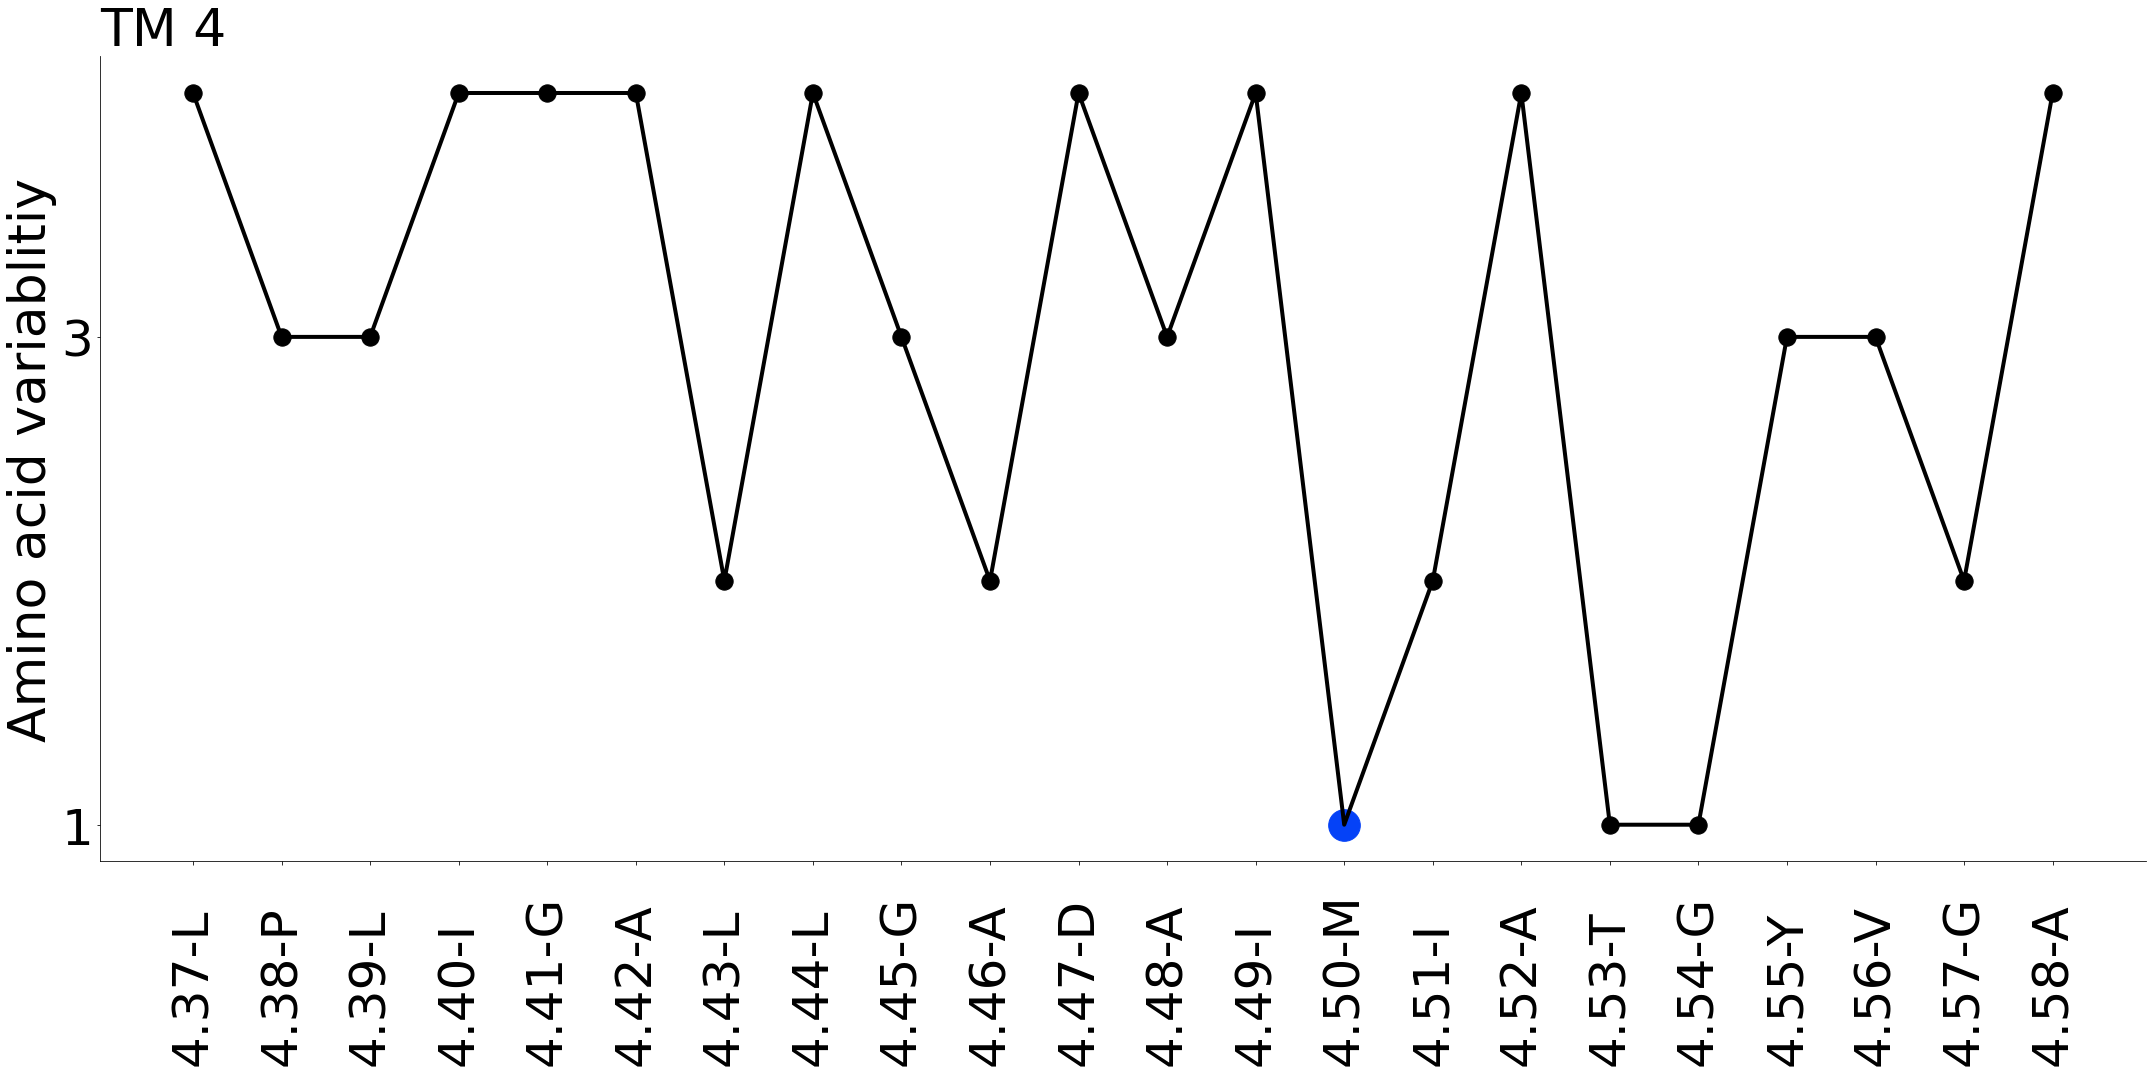

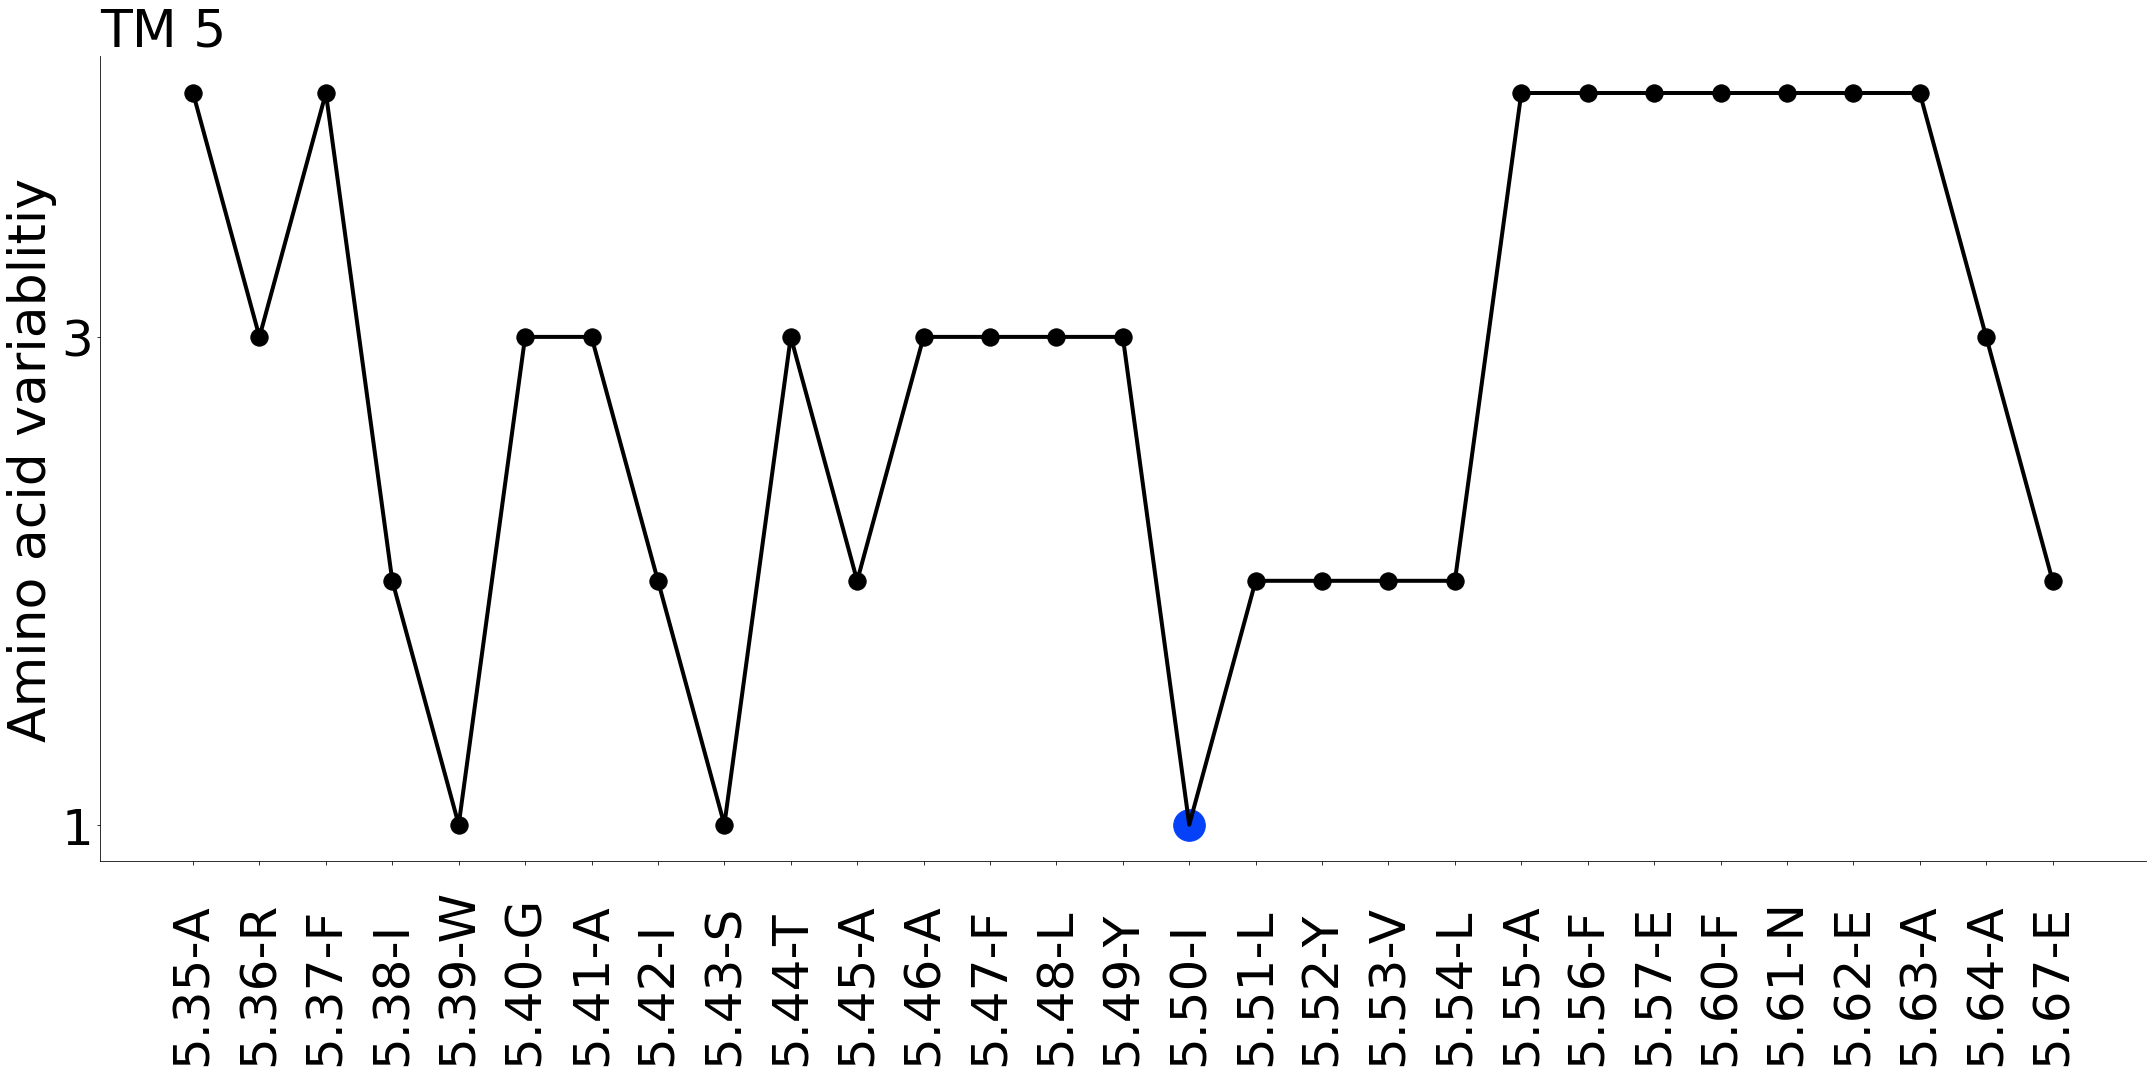

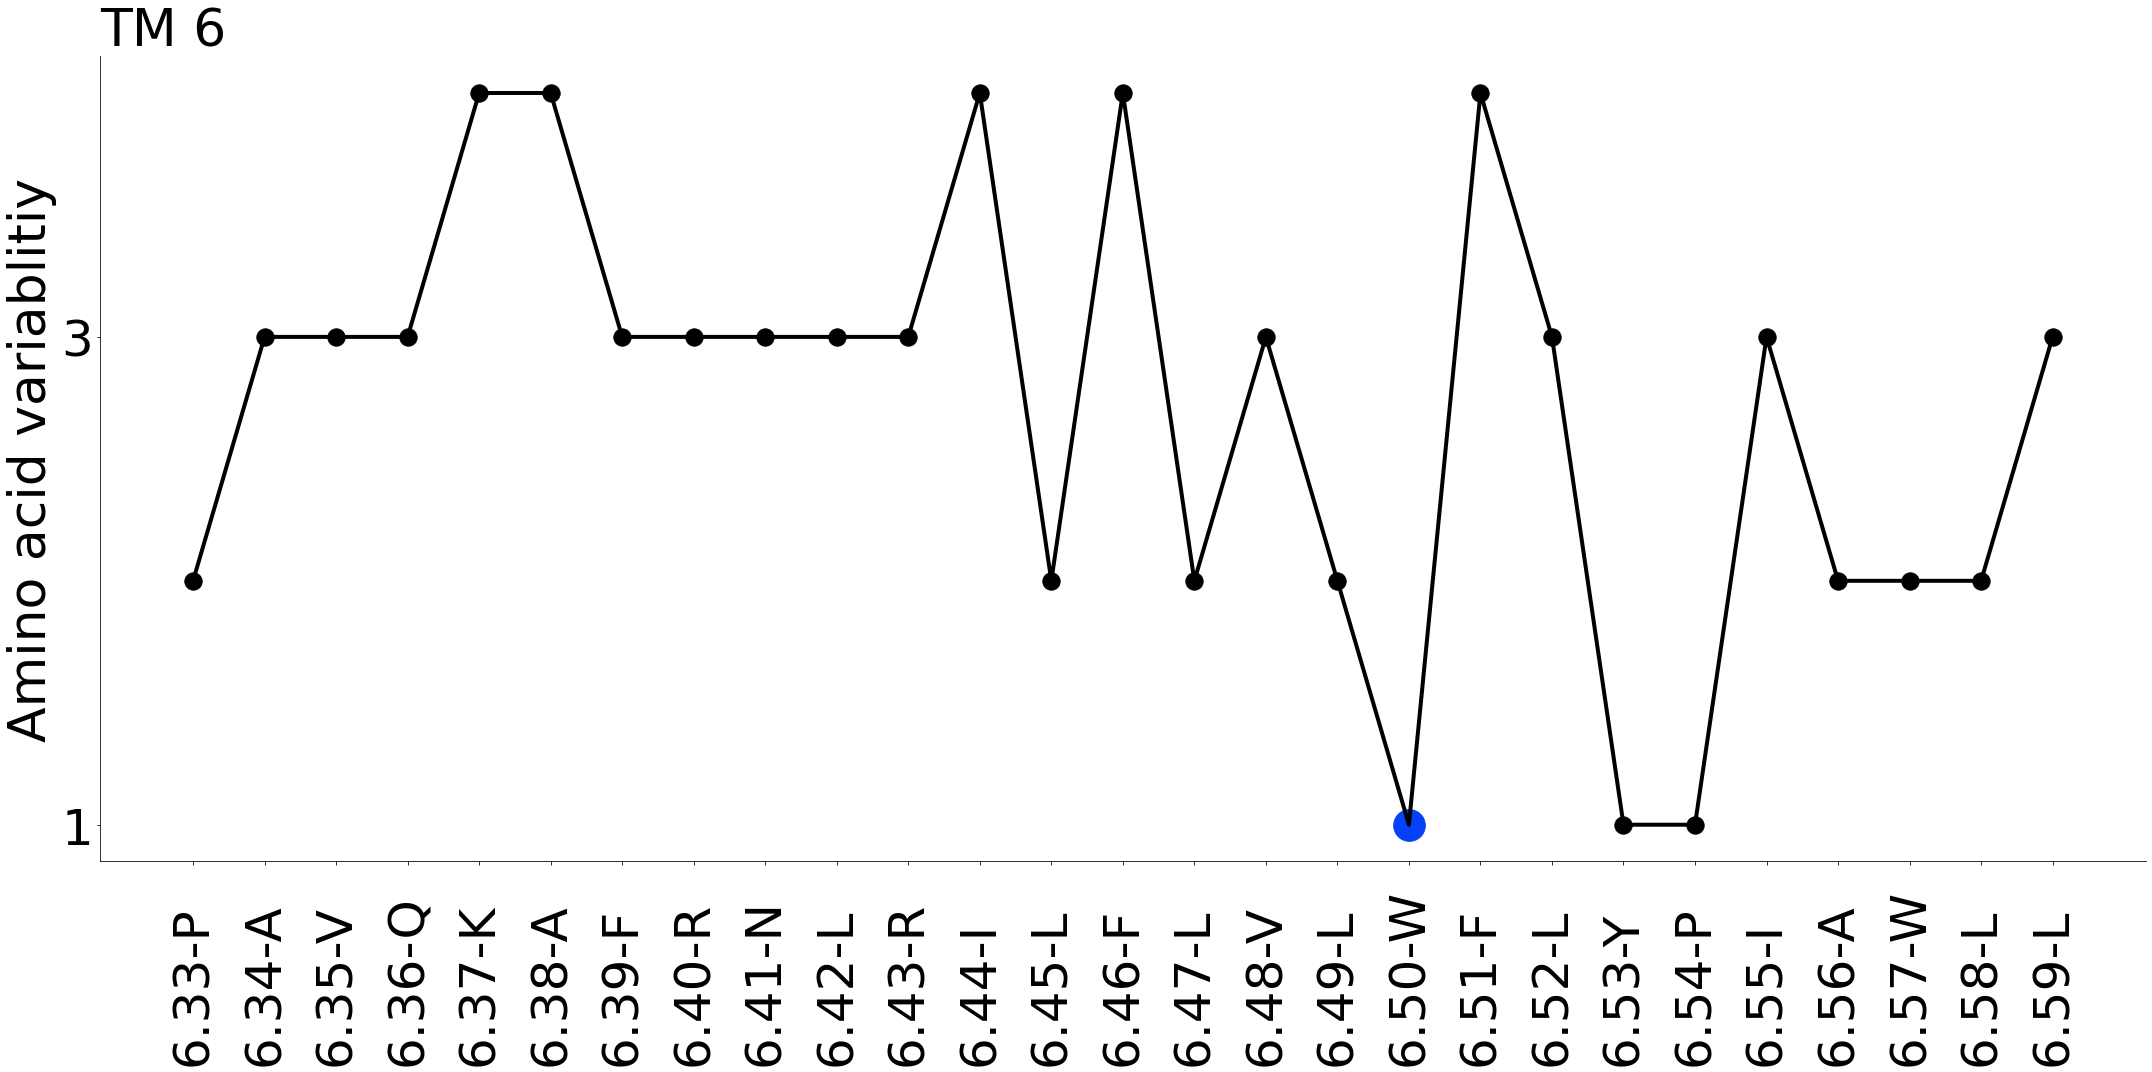

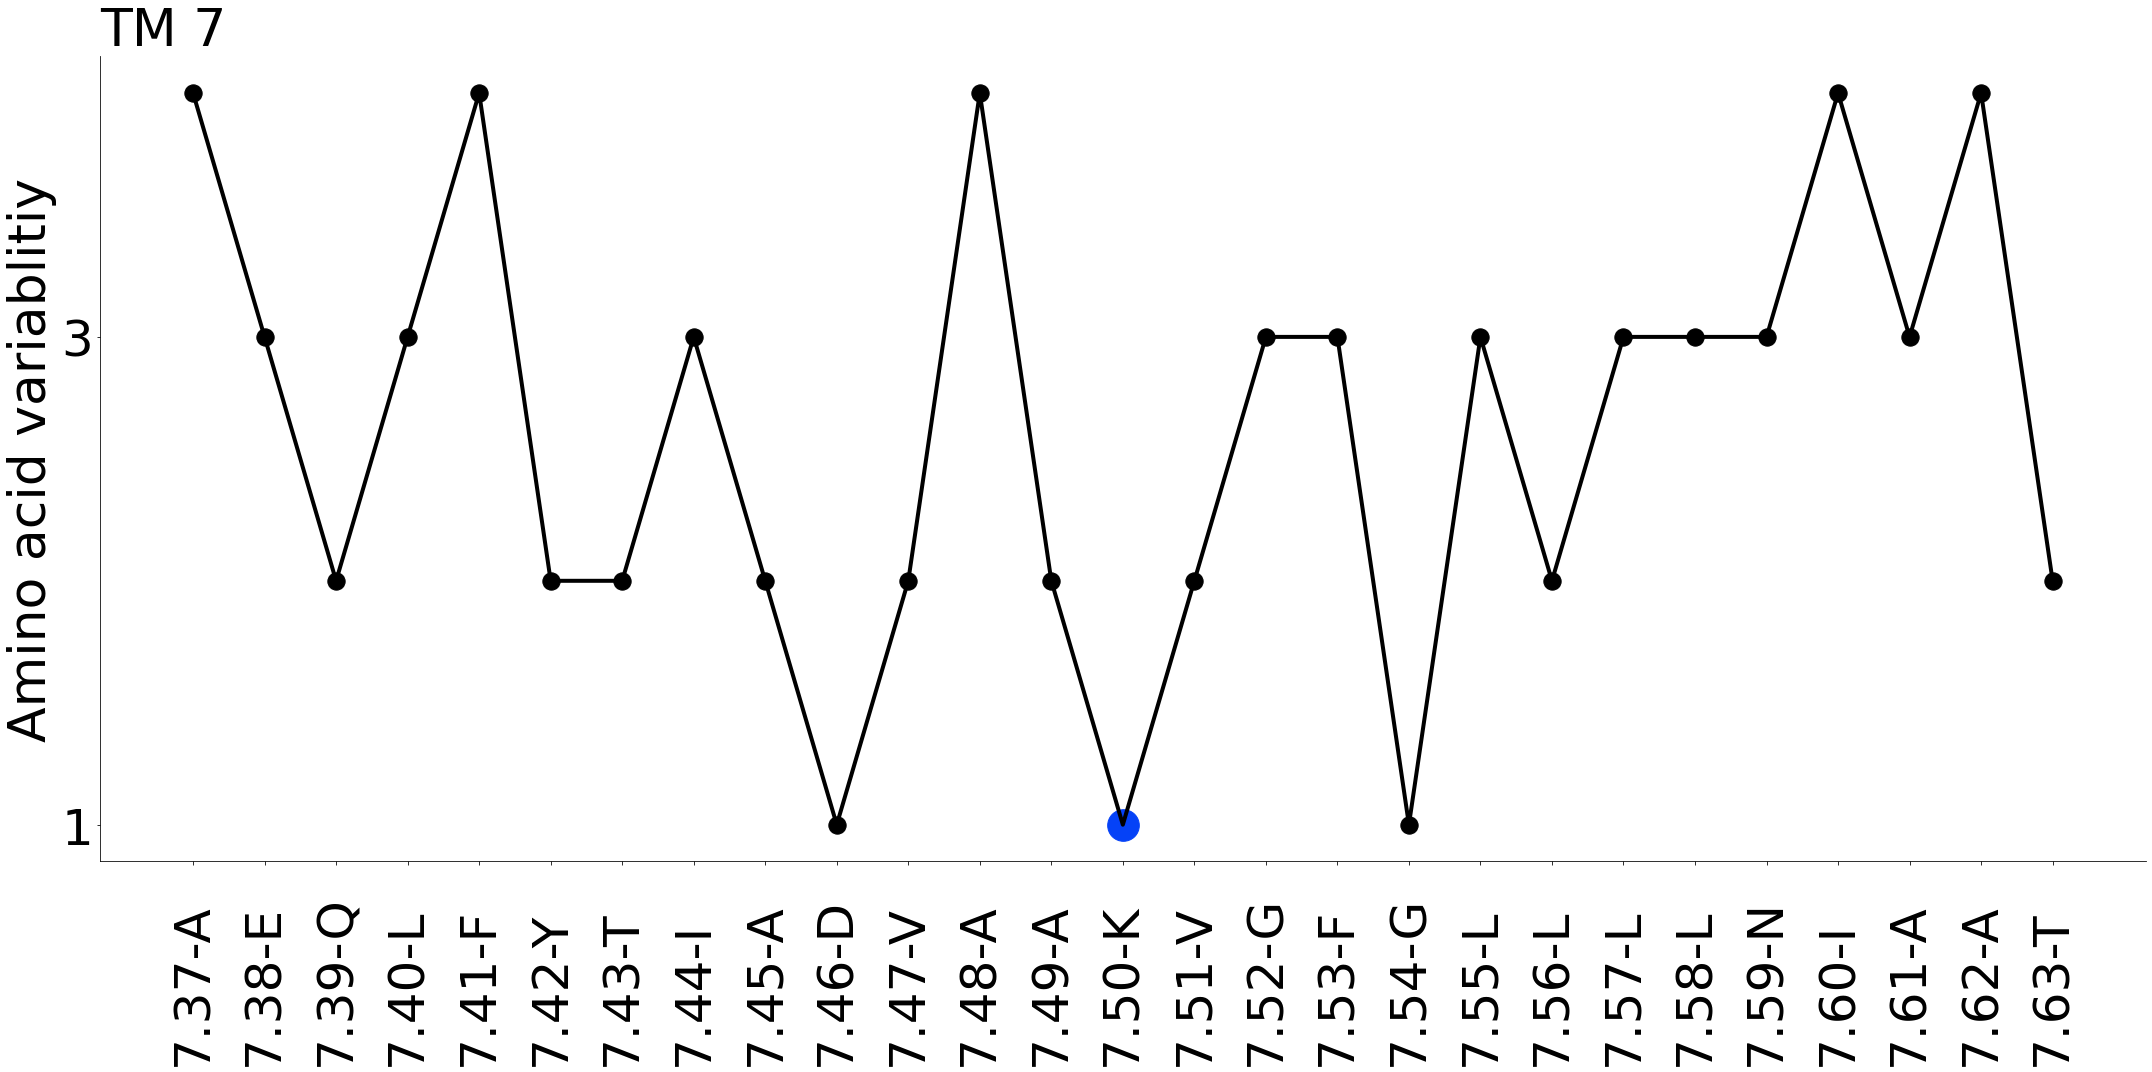

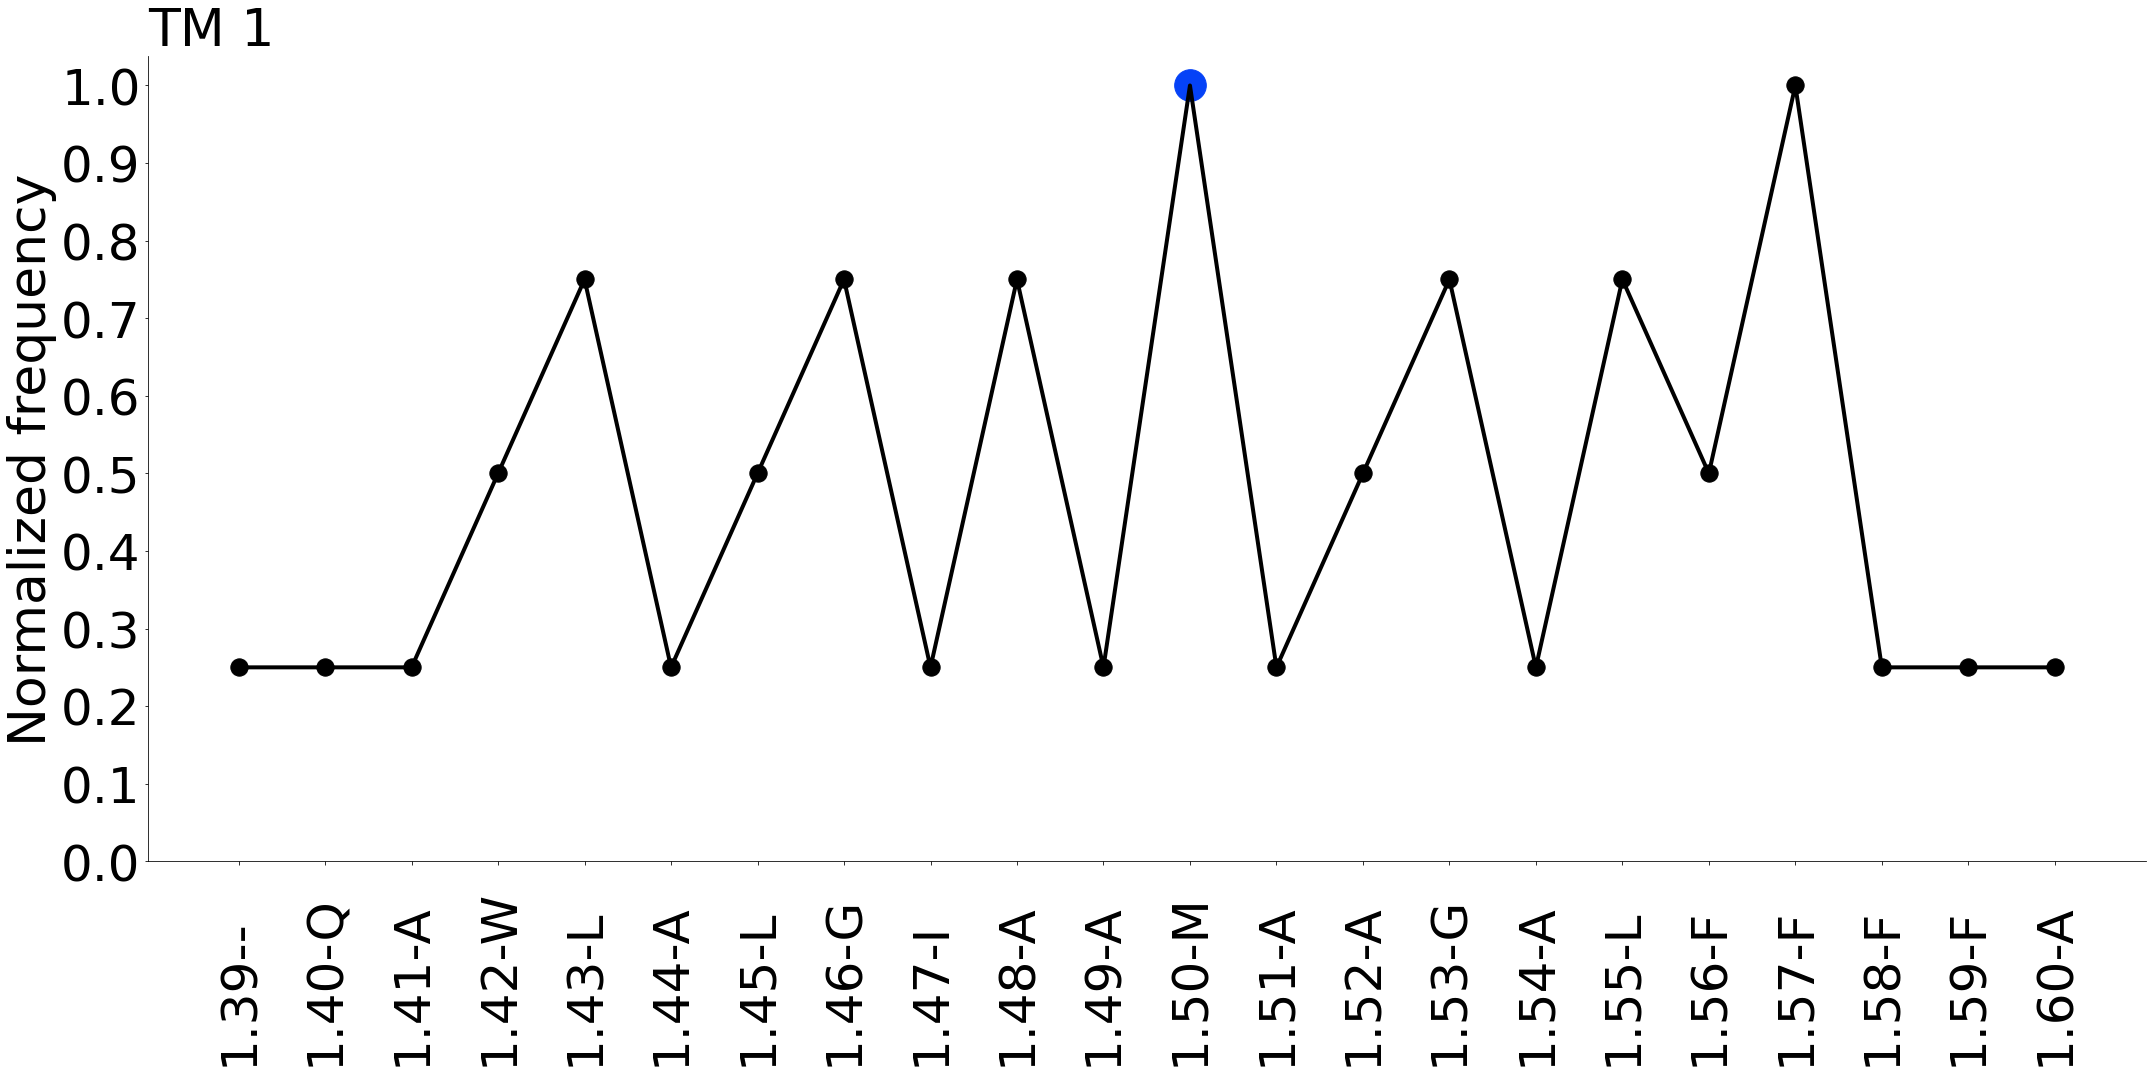

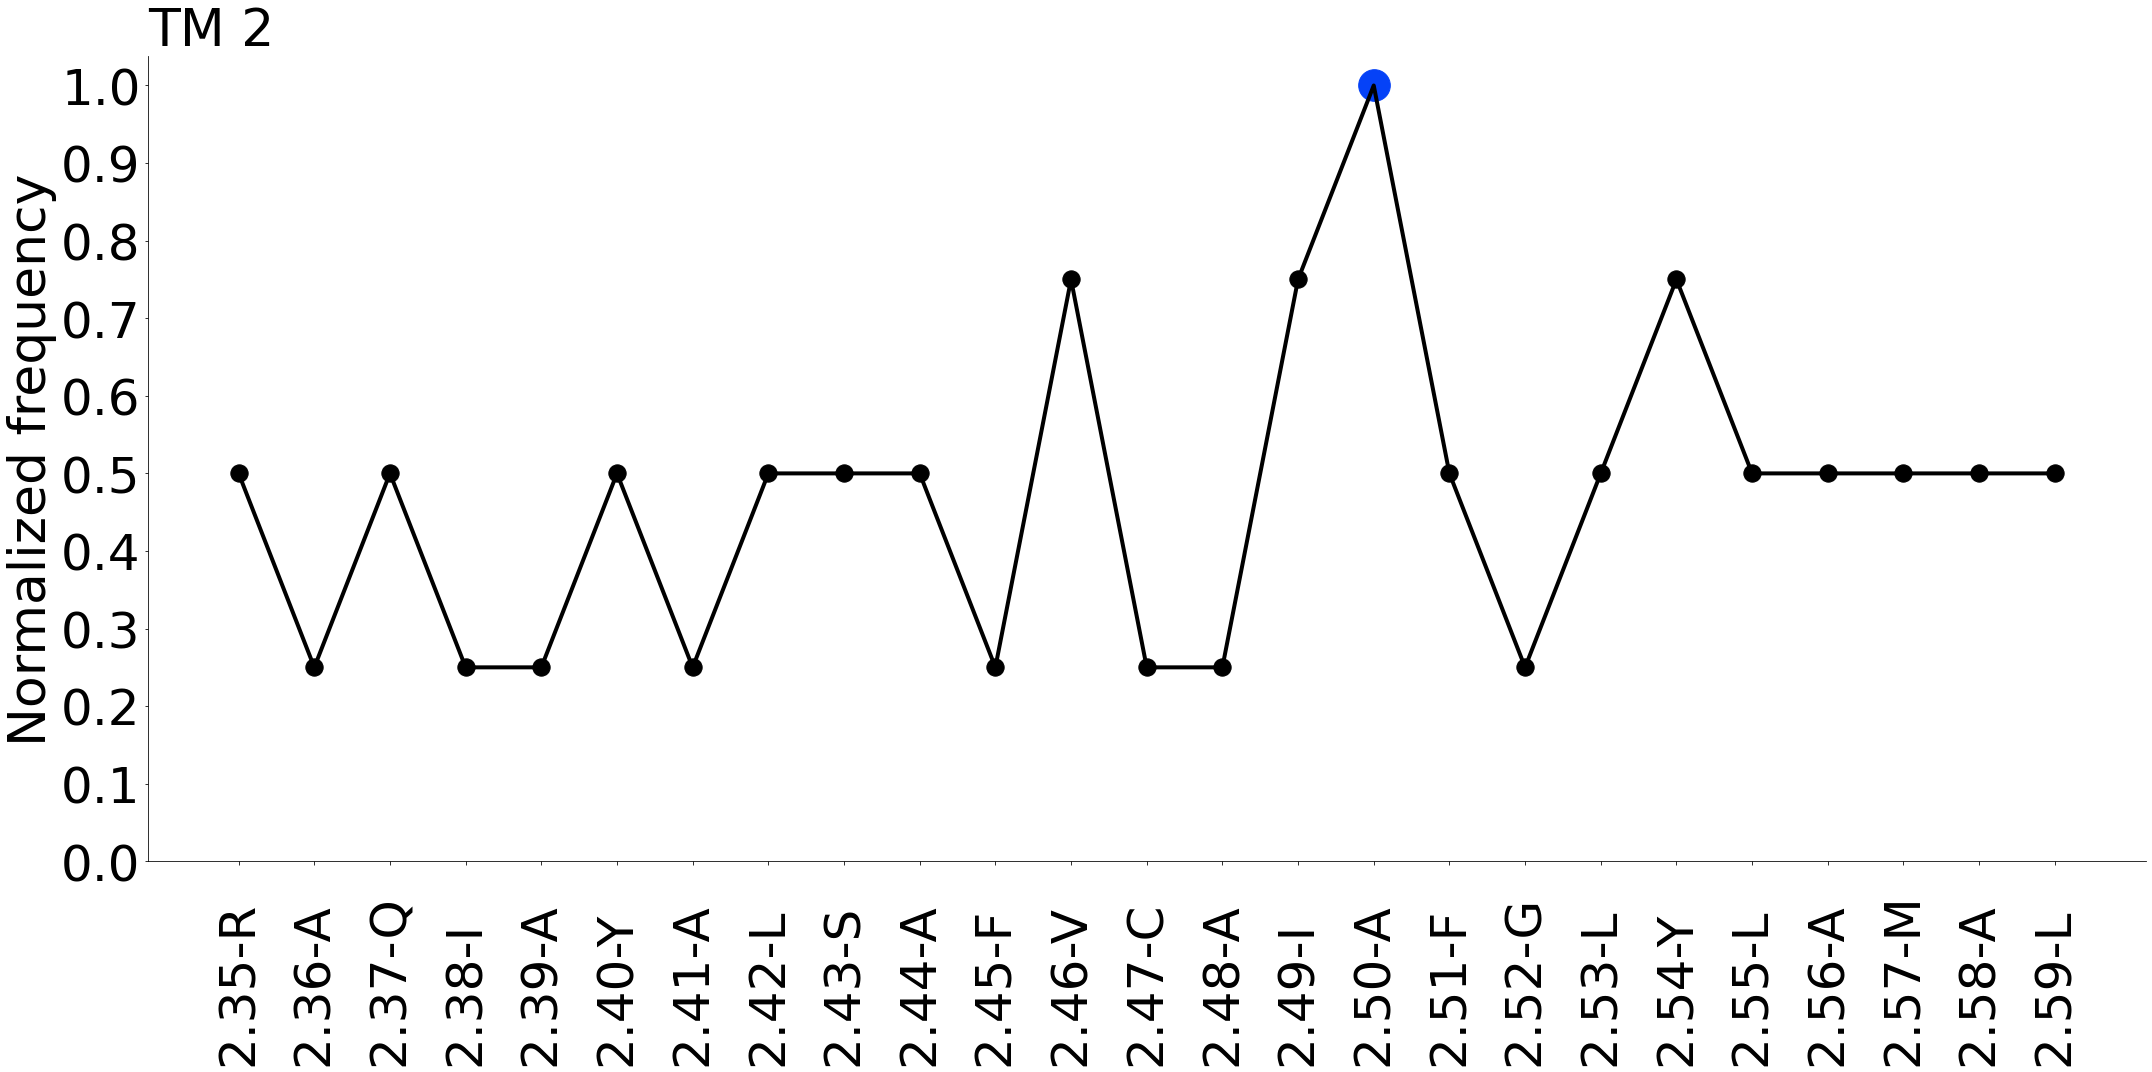

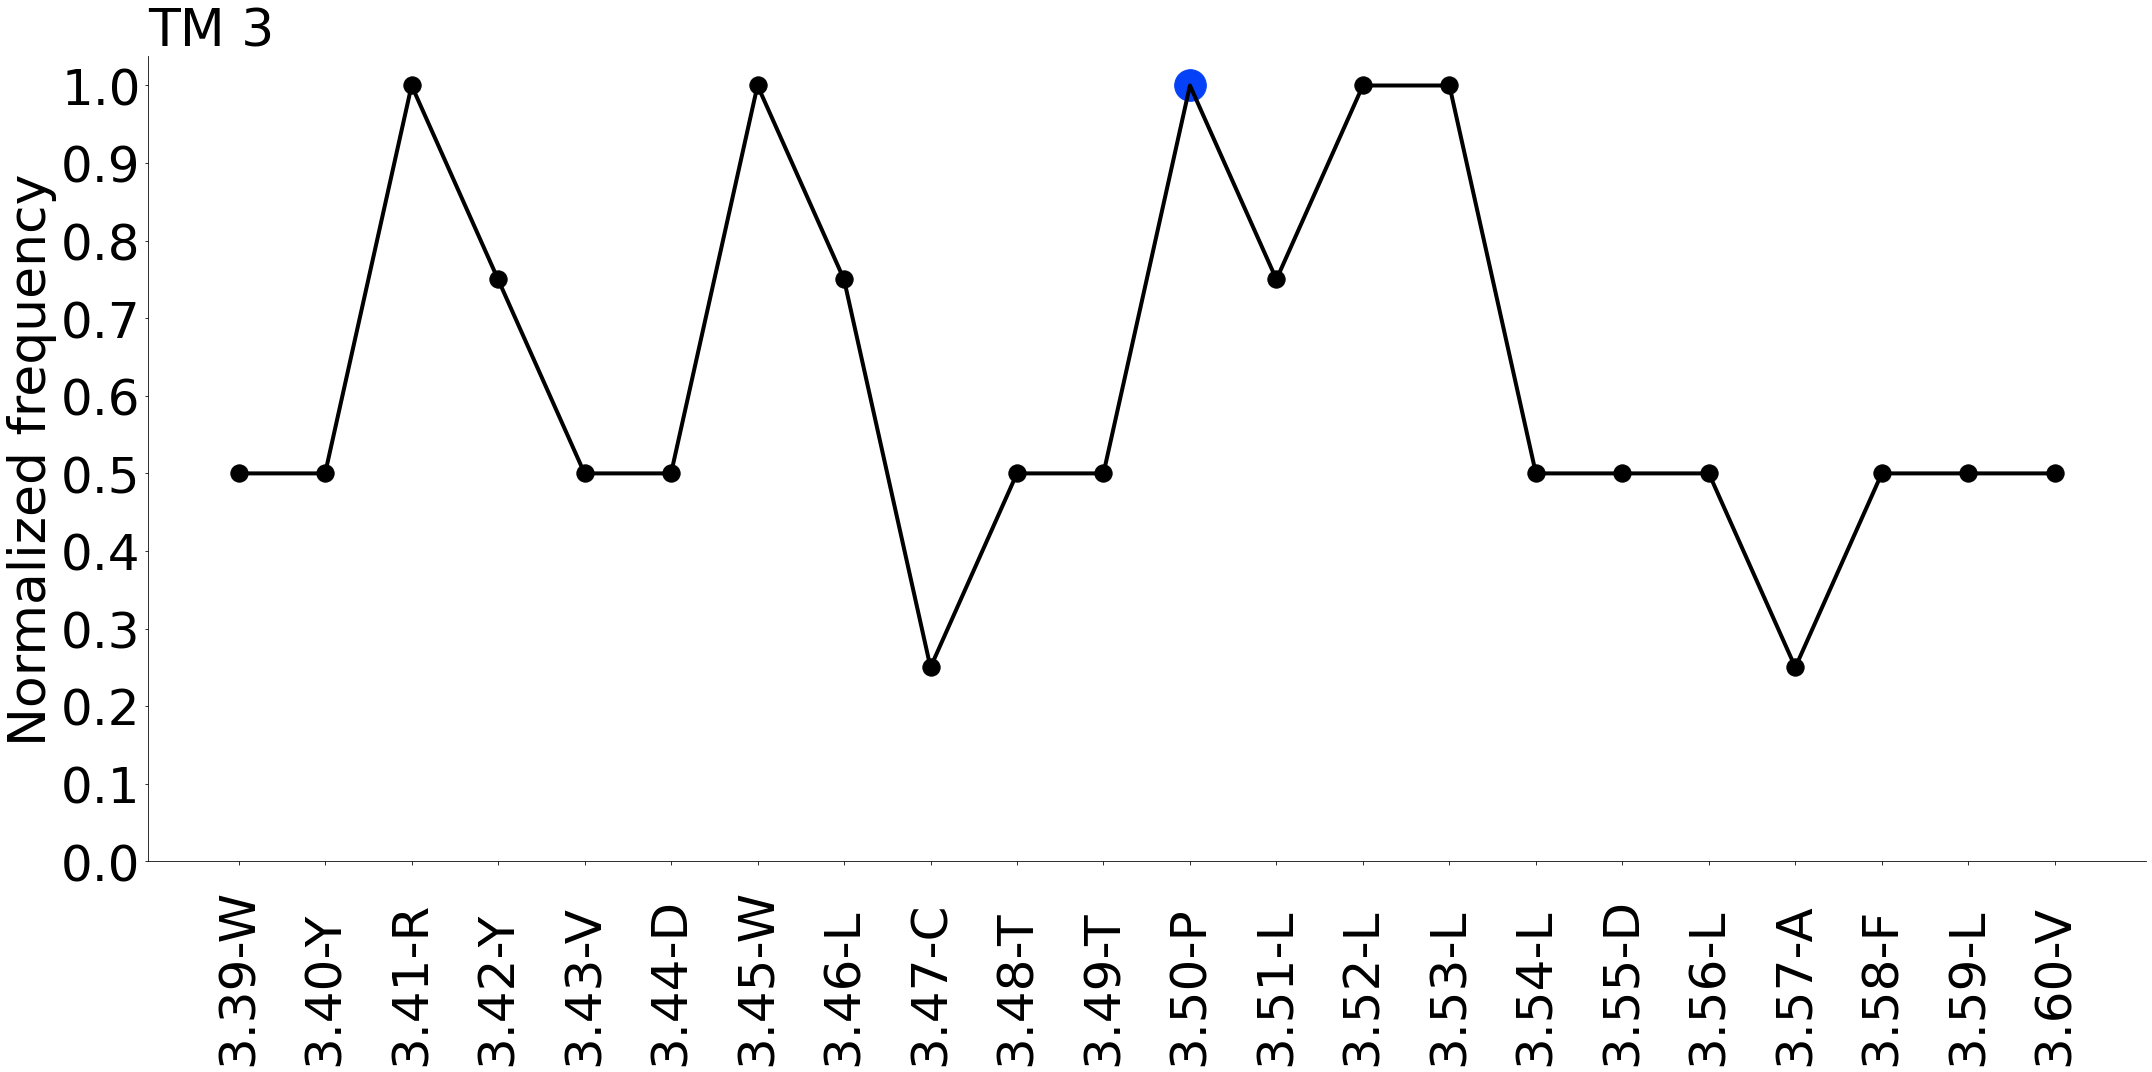

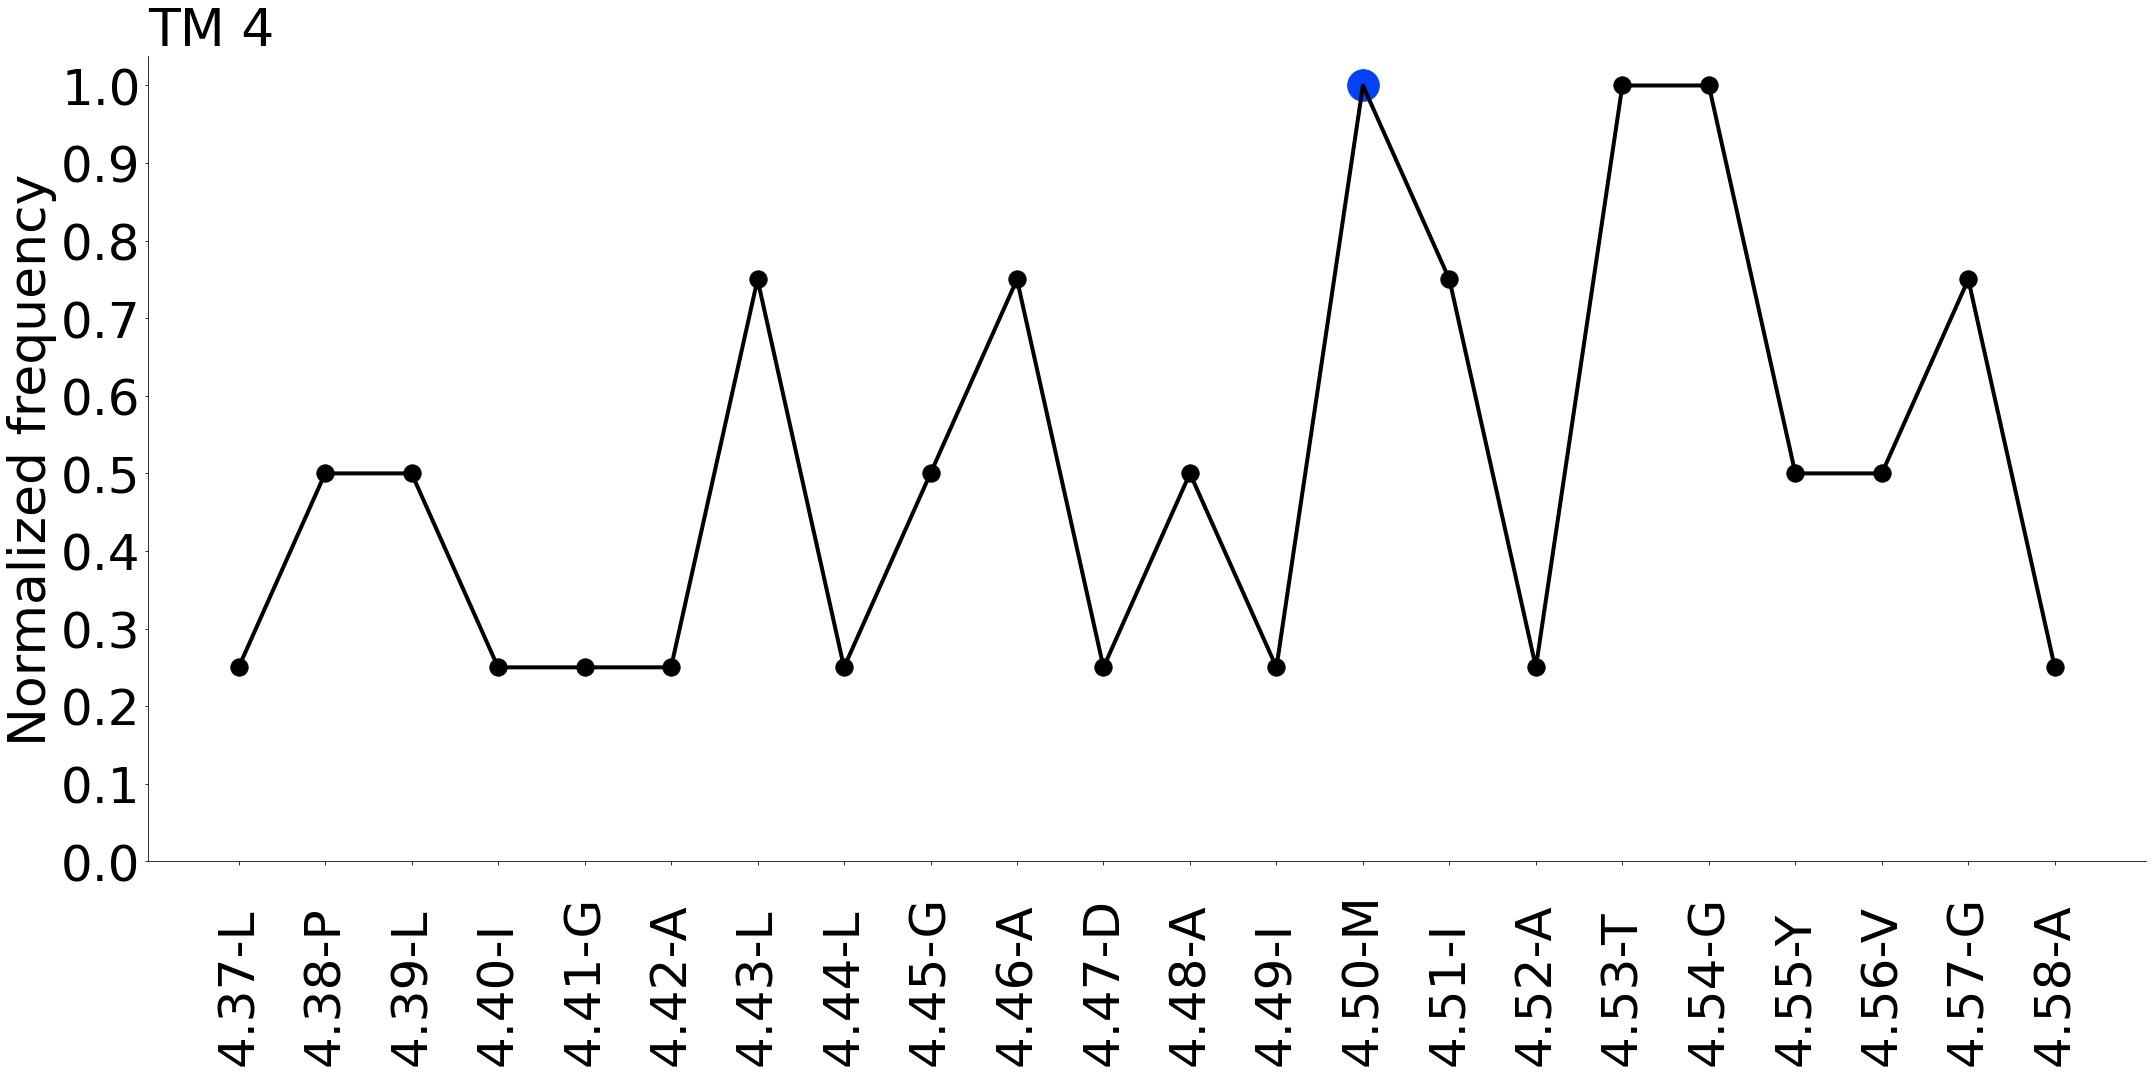

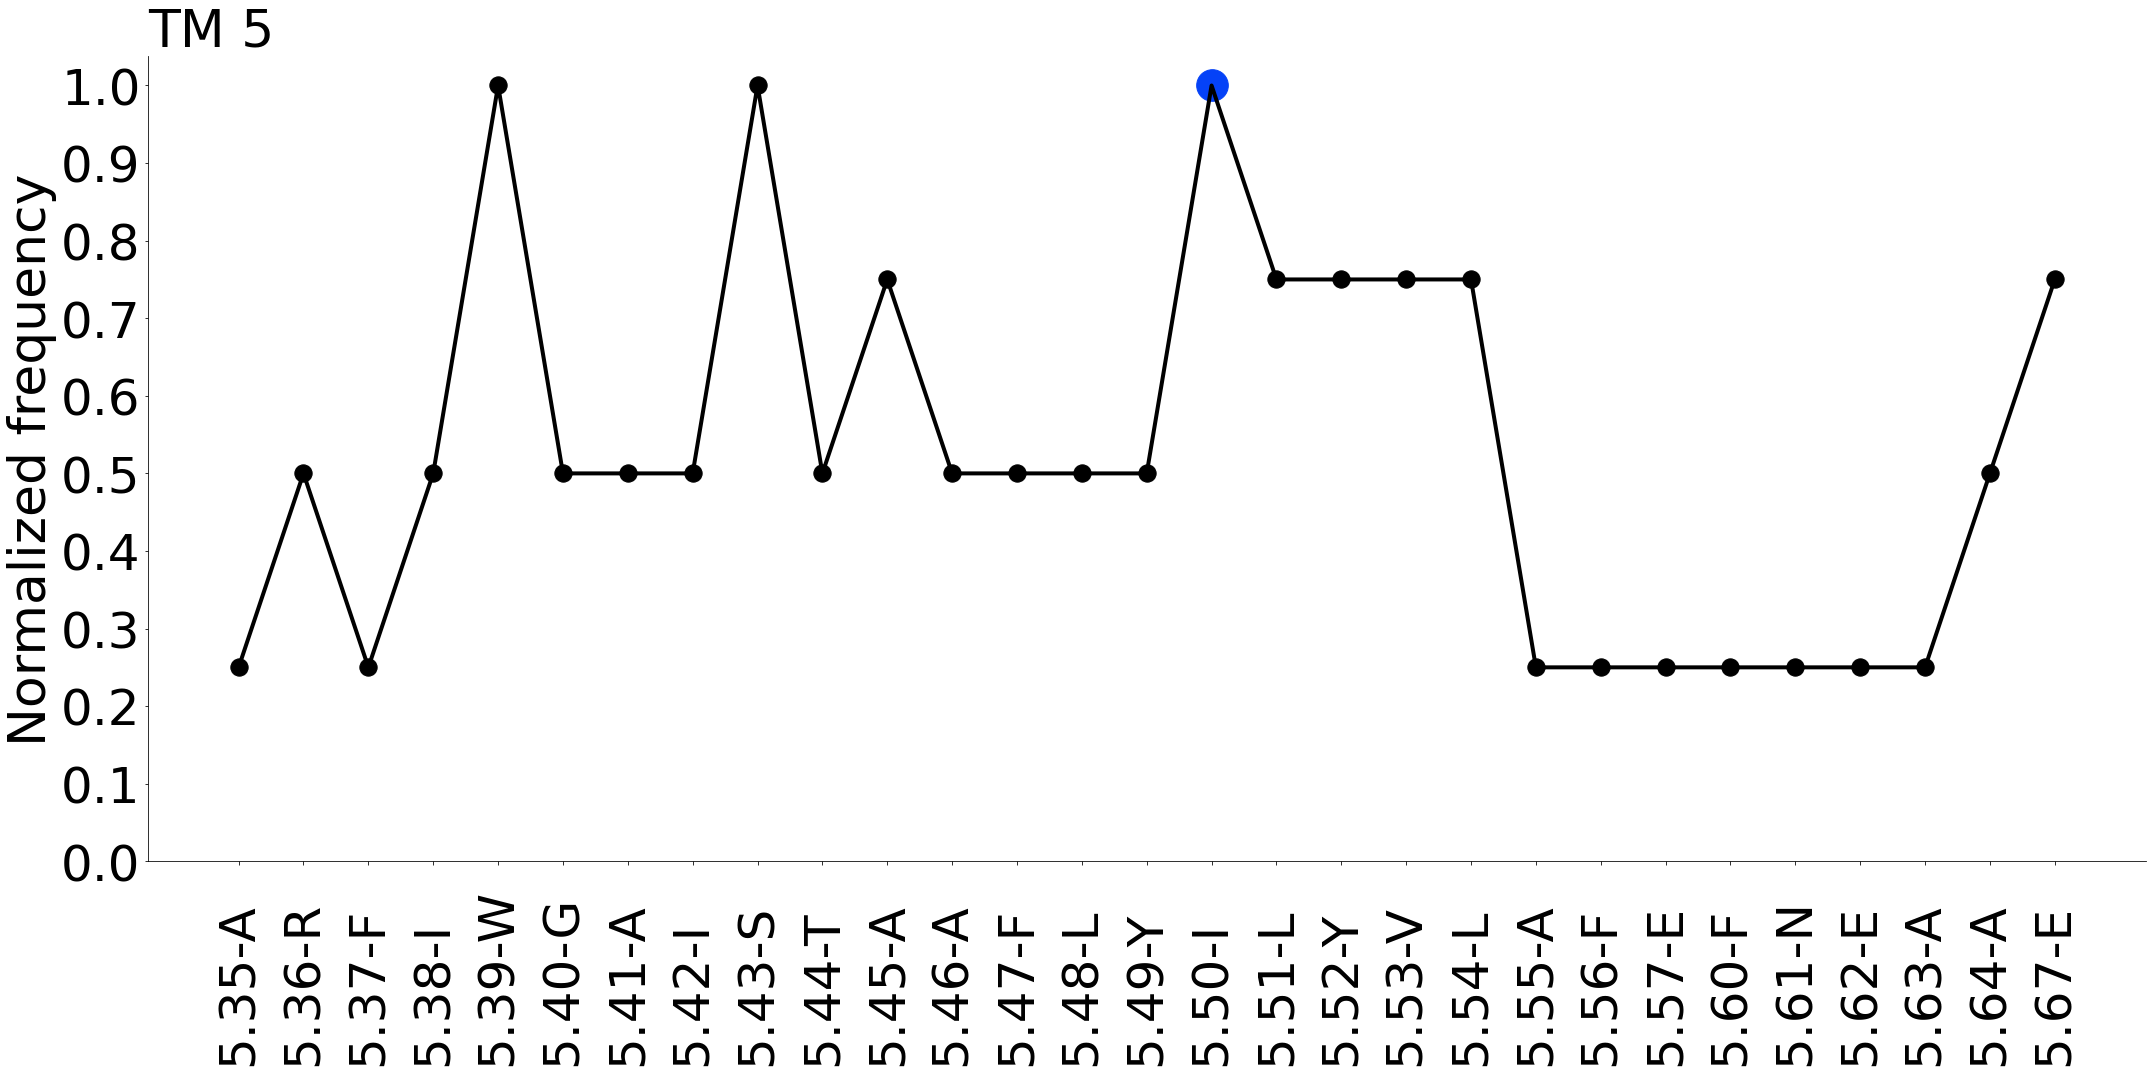

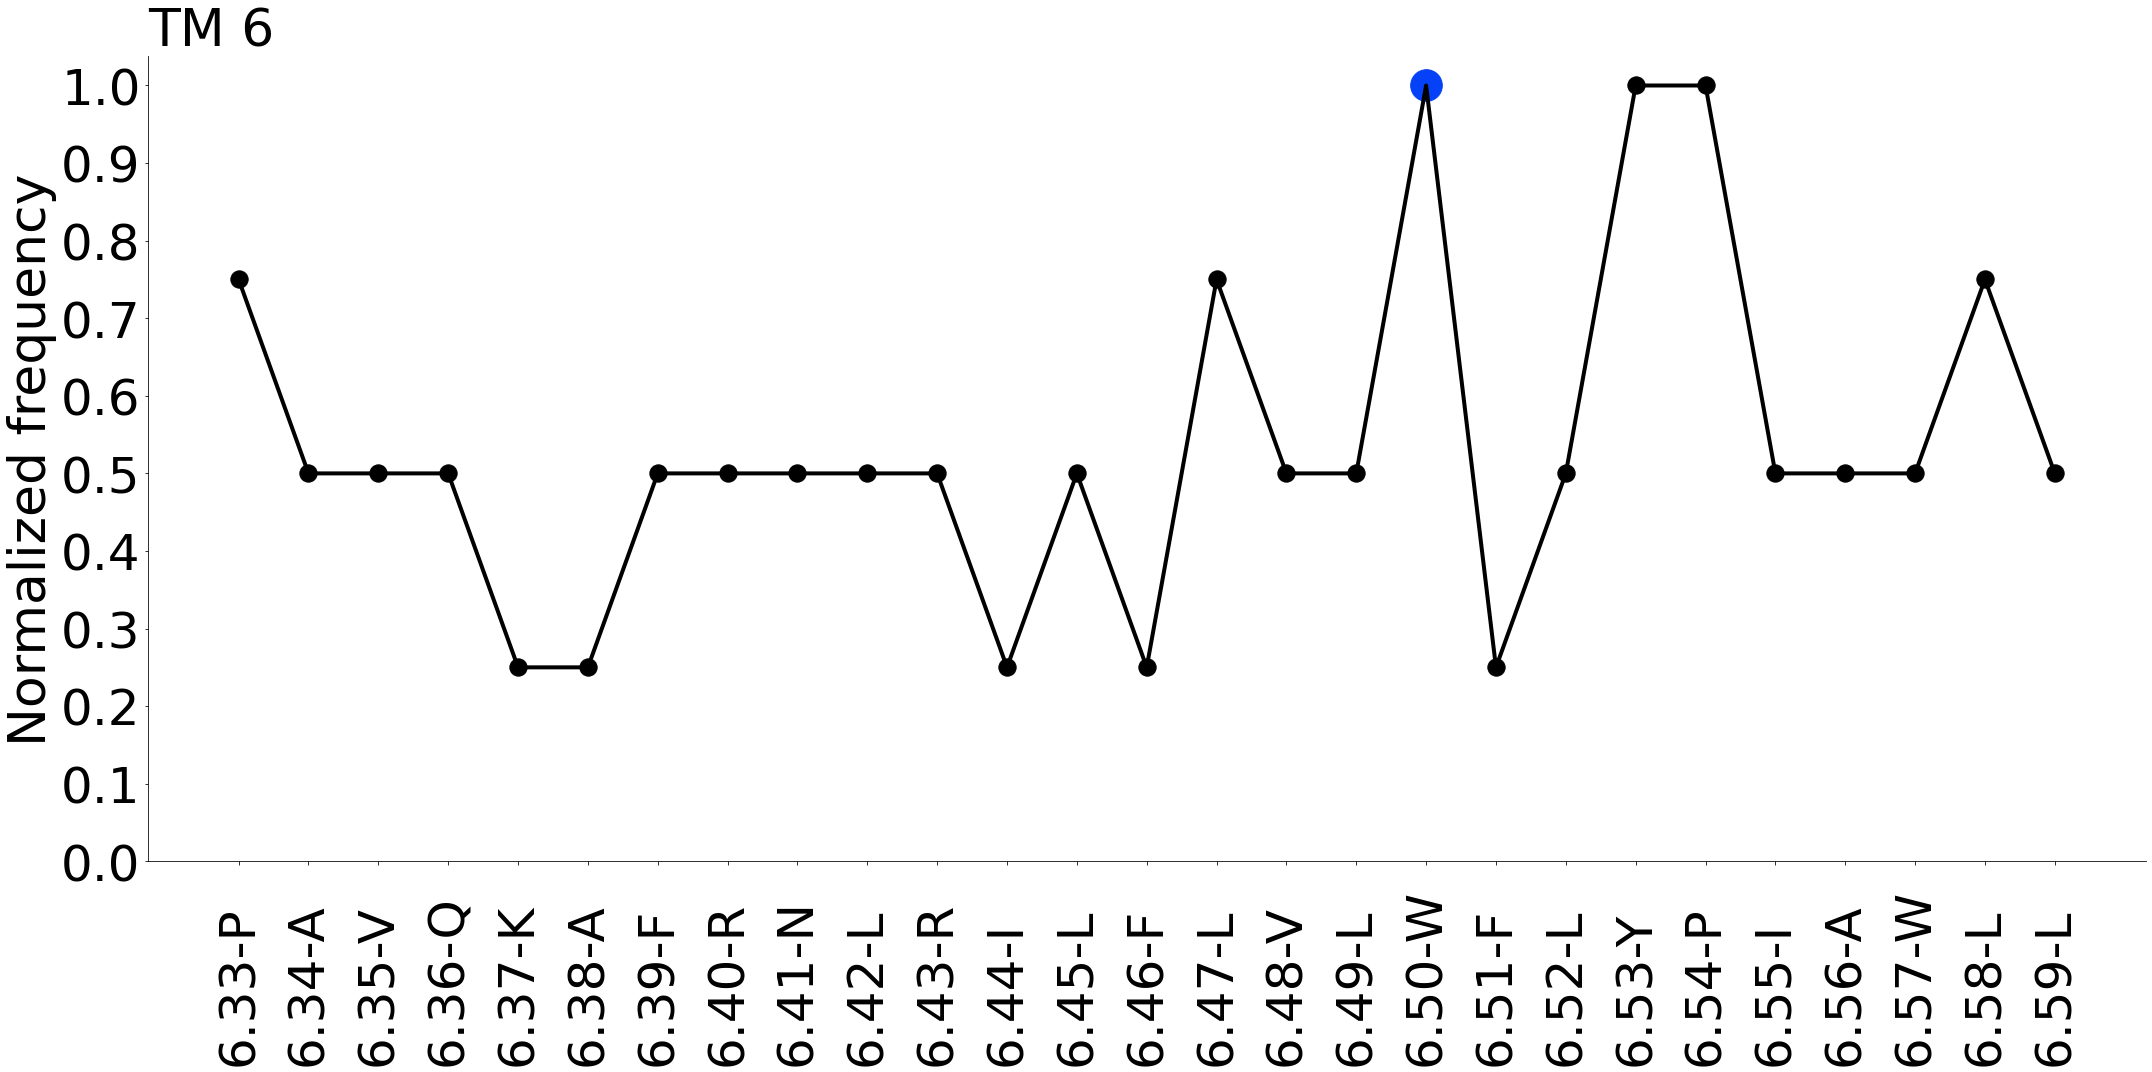

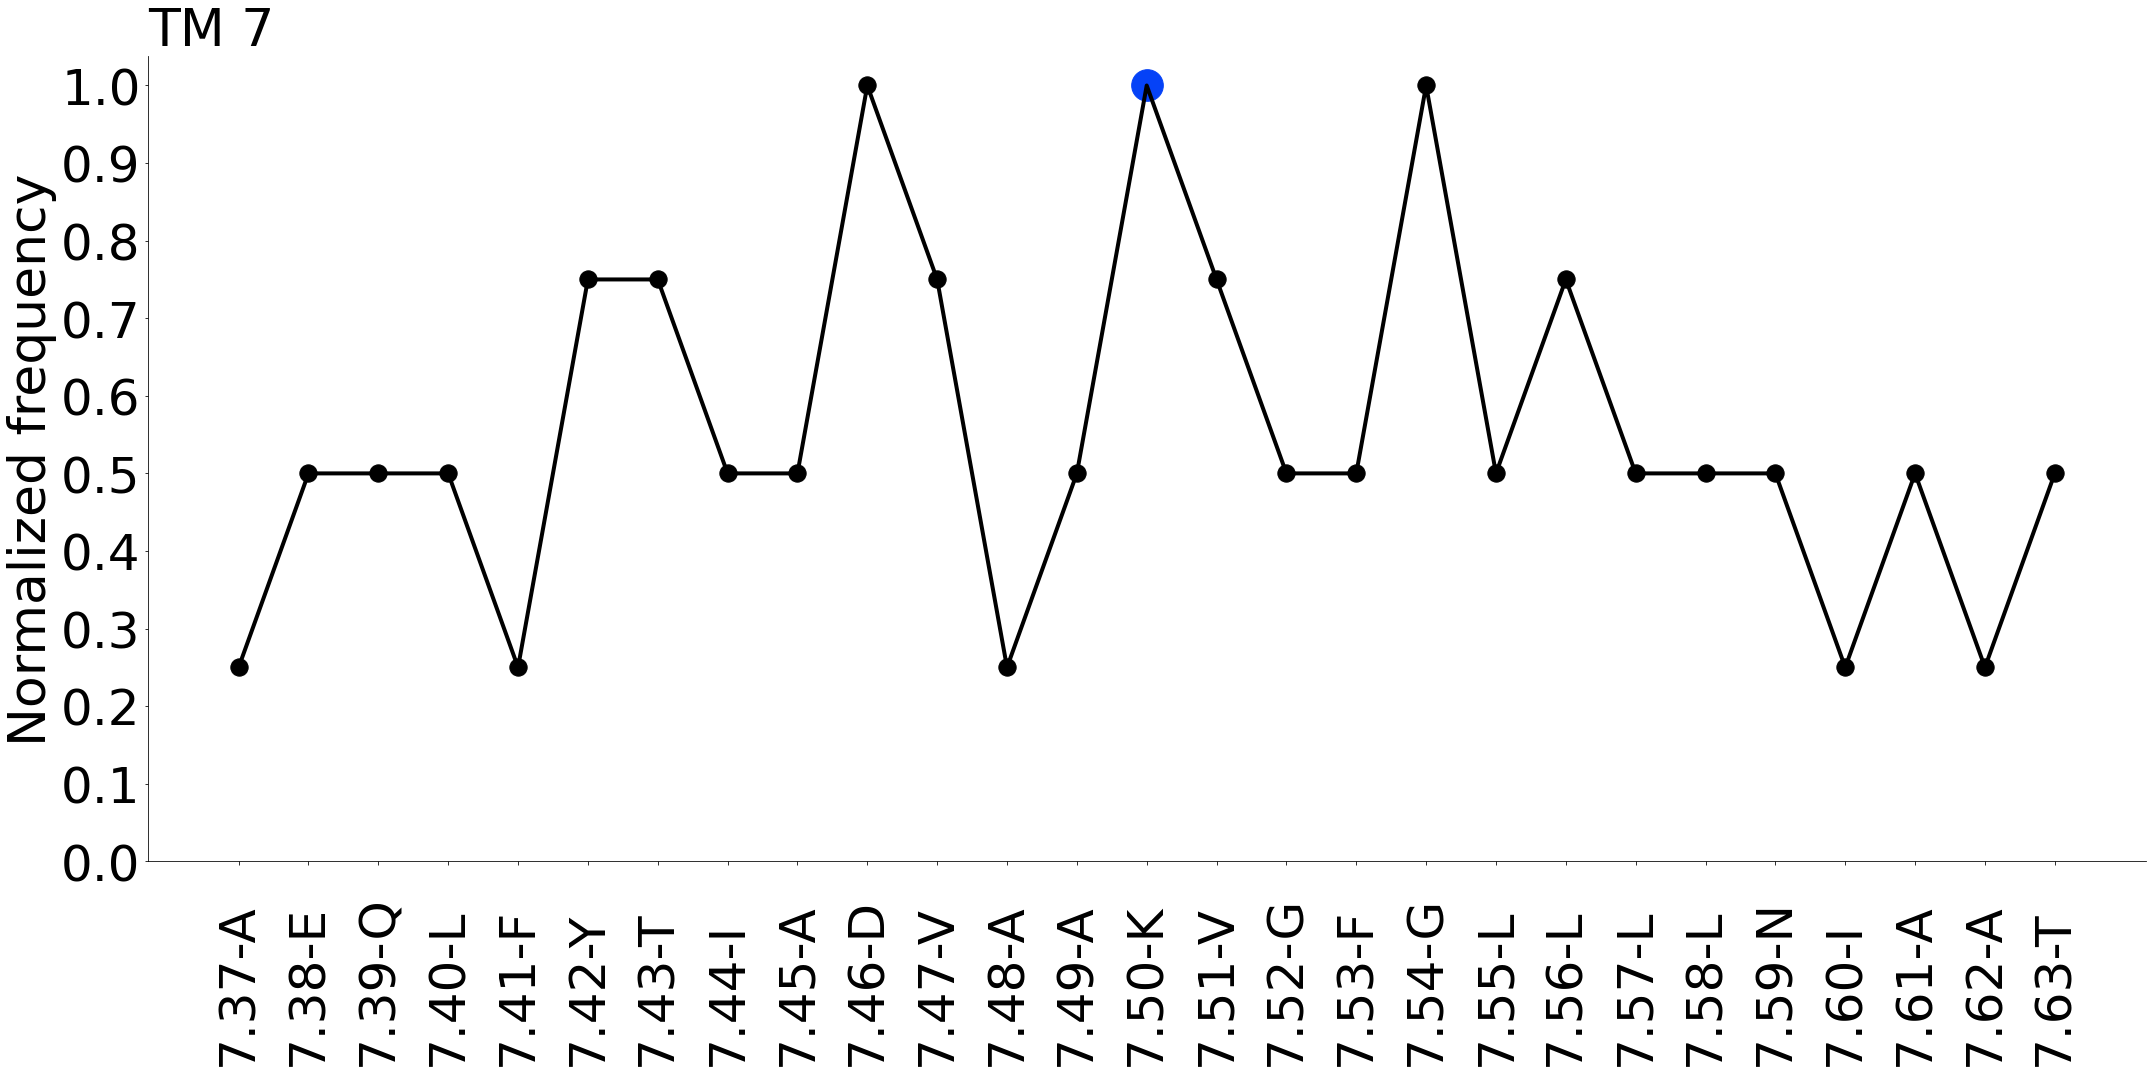

In [11]:
path_to_save_plots = os.path.join(pdb_source_folder, 'plots')

create_profiles(sequence_conservation, path_to_save_plots, 'amino_acid_variability')
create_profiles(sequence_conservation, path_to_save_plots, 'conservation')